## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [259]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('C:\cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [261]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


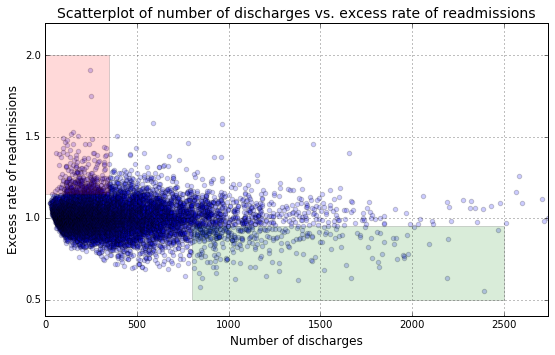

In [262]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## ANALYSIS:

**A. Do you agree with the above analysis and recommendations? Why or why not?**
I only partially agree with the above preliminary report. While technically correct, the preliminary report is misleading in that the report overstates the observed effect. This is very problematic, because the preliminary report makes far-reaching recommendations that are not warranted by the data. 

More specifically, as I will show below below, the effect size is actually fairly small, and the above analysis cherry-picked the data by comparing the extremes (i.e. where the number of discharges < 100 versus > 1000). Furthermore, no hypothesis testing was provided at all in the prelimary report.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
# My report

**A. Initial observations based on the plot above**
+ The original report is correct that the rate of readmissions does trend downward with increasing number of discharges.
+ Unfortunately, the plot included in the preliminary report is somewhat misleading in that it doesn't really highlight how small the actual trend is. To better visualize how small the effect is, three new plots have been included in this report. In these plots, the readmission datapoints have been binned together based upon the number of discharges (ranging from 0 to 1500 and incrementing by 100). In the top plot, the mean readmission rate is shown with errorbars included for the standard error of the mean. It's clear from this plot that there is a downward trend, in which the rate of readmissions decreases with increasing number of discharges. However, in the middle plot where the errorbars are switched from standard error to standard deviation (emphasizing dataset variability), we can see how little the downward trend explains the readmission data. In fact, in the bottom plot, we overlay the middle plot on the scatterplot included in the original report. We can see in this plot that the means of each readmission bin are effectively flat, which graphically illustrates that while a downward trend does indeed exist, this trend is weak.  
+ Furtermore, the original report primarily focuses on regions of greater/lower indicidence in the excess rate of readmissions (areas shaded red and green respectively). Unfortunately by focusing only on these regions, the original report exaggerates the relationship between readmission and number of discharges. This is because the greatest density of points lie outside these two regions (~95% of the data).

**B. Statistics**
+ The number of discharges only weakly predicts the excess rate of readdmissions. This was quantified by computing the linear correlation between the number of discharges and excess rate of readdmissions exists (r=-0.09). All data was used in this analysis. Although this correlation is statistically significant because of large sample sizes (p<<0.0001), the fraction of explained variance (i.e. coefficient of determination) by the proposed relationship is low: FoV = 1-R = 1-r^2 = 0.0087. This means that less than 1% of the variance in the rate of readmissions is explained by the number of discharges. So while the preliminary report did correctly state there is a statistically significant correlation between hospital capacity (number of discharges) and readmission rates, the relationship is actually weak with poor explanatory power. 
+ Furthermore, the original report focused on differences between hospitals/facilities where the number of discharges < 100 versus those where the number of discharges > 1000. While the difference is a statistically significant result (p<<0.0001), the effect size for this difference is actually not large (~0.5). 

**C. Conclusions**
+ Although there is a significant anti-correlation between hospital capacity (number of discharges) and readmission rates, the effect is weak. 
+ Other factors beyond hospital capicity should be considered in future studies, such as whether certain hospitals lack the necessary resources to ensure quality care and prevent complications that lead to readmission. However, this report strongly emphasizes that quality care is not necessarily tied to a hospital's capacity. Other factors such as location, median income of the hospital's municipality, and demographics might all be more relevant factors.

**D. Regulatory policy recommendations**
+ This report strongly disagrees with both regulatory policy recommendations made in the preliminary report, which punitively punish hospitals with small capicity. Because the effect size for the relationship between the number of discharges and excess rate of readdmissions actually ranges between small to moderate (depending on how much data is compared), it is unreasonable to make sweeping policy decisions based on any differences. 
+ At this time, no sweeping policy recommendations should be made, and instead further study is necessary to determine whether other factors might account for higher readmission rates. 

# ANALYSIS
Part 1.) New plots highlighting the immense variability in the dataset

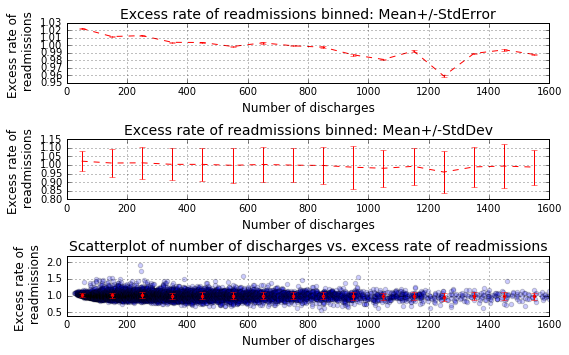

In [263]:
np_x=np.double(x);
np_y=np.double(y)
bins=np.linspace(0,1500,16);
binnedY=np.zeros([16,3]);
for i in range(len(bins)):
    selectedValues=(np_x>bins[i]) & (np_x<(bins[i]+100));
    binnedY[i,0]=np.mean(np_y[selectedValues]);
    binnedY[i,1]= np.std(np_y[selectedValues]);
    binnedY[i,2]= np.std(np_y[selectedValues])/np.sqrt(selectedValues.size);
    
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(8,5))
for i in [0,1,2]:
    if i==0:
        ax[i].errorbar(bins+50,binnedY[:,0],yerr=binnedY[:,2],fmt='--r',ecolor='r')
        ax[i].set_title('Excess rate of readmissions binned: Mean+/-StdError', fontsize=14)
    elif i==1:
        ax[i].errorbar(bins+50,binnedY[:,0],yerr=binnedY[:,1],fmt='--r',ecolor='r')
        ax[i].set_title('Excess rate of readmissions binned: Mean+/-StdDev', fontsize=14)
    elif i==2:
        ax[i].scatter(x, y,alpha=0.2)
        ax[i].errorbar(bins+50,binnedY[:,0],yerr=binnedY[:,1],fmt='.r',ecolor='r')
        ax[i].set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
    ax[i].set_xlim([0, 1600]);
    ax[i].set_xlabel('Number of discharges', fontsize=12)
    ax[i].set_ylabel('Excess rate of \n readmissions', fontsize=12)
    ax[i].grid(True)
fig.tight_layout()

Part 2.) Linear correlation between the number of discharges and excess rate of readmission:

In [270]:
from scipy import stats
correlationValues=np.corrcoef(x,y)
n=len(x);
r=correlationValues[0,1]
t=r*np.sqrt((n-2.0)/(1.0-r**2))
p=stats.t.sf(np.abs(t), n-2)*2;
"Pearson's correlation coefficient: r = {:05.4f} (t-statistic = {:06.4f}, p-value = {})".format(r,t,p)

"Pearson's correlation coefficient: r = -0.0931 (t-statistic = -10.0234, p-value = 1.50227564266e-23)"

Part 1.) Comparison of rate for readdmission between hospitals/facilities with number of discharges < 100 versus hospitals/facilities with number of discharges > 1000.

Before proceeding with a two-sample hypothesis test to compare differences between the two groups, we need to first determine whether the two groups significantly differ from normal distributions. This will help us determine whether to use a two-sample t-test or a two-sample Wilcoxon rank-sum test. We will specifically  use the Shapiro-Wilk test to test for normality, which tests whether the samples significantly deviate from the null hypothesis (i.e. a normally distributed population).

In [274]:
from IPython.display import display
from scipy import stats
readmissionRate = np.double(y);
group100 =(np.double(x)<=100 ) & (np.isnan(y)==False);
group1000=(np.double(x)>1000 ) & (np.isnan(y)==False);

[testStatShapiro100 ,pShapiro100 ]=stats.shapiro(readmissionRate[group100]);
[testStatShapiro1000,pShapiro1000]=stats.shapiro(readmissionRate[group1000]);
display("Testing whether data deviates from a normal distribution (Shapiro-Wilk test): p-value={} for Group<100 and p-value={} for Group>1000".format(pShapiro100,pShapiro1000))

'Testing whether data deviates from a normal distribution (Shapiro-Wilk test): p-value=2.04881405495e-29 for Group<100 and p-value=6.58256176393e-05 for Group>1000'

Since the p-values are very significant, this means the data from the two groups are not normally distributed. To assess for significant differences between the group, we will then have to use a non-parametric test: the two-sample Wilcoxon rank-sum test.

In [275]:
[testStatisticRankSum,pRankSum]=stats.ranksums(readmissionRate[group100],readmissionRate[group1000]);
display("Two-sample, non-parametric test for differences (Rank-Sum): p={}".format(pRankSum))

'Two-sample, non-parametric test for differences (Rank-Sum): p=2.57174322608e-13'

Although this effect is statistically significant, we should determine the strength of this difference by testing for the effect size (via Cohen's d'):

In [276]:
def computeEffectSize(group1,group2):
    """compute Cohen's d' to estimate the effect size of the difference between the two groups"""

    pooledStdDev=np.sqrt(((len(group1)-1)*np.std(group1)**2+(len(group2)-1)*np.std(group2)**2)/(len(group1)+len(group2)-2));
    return (np.mean(group1)-np.mean(group2))/pooledStdDev;

SamplesAbove1_Group100=(0.0+np.sum(readmissionRate[group100]>1))/len(readmissionRate[group100])
SamplesAbove1_Group1000=(0.0+np.sum(readmissionRate[group1000]>1))/len(readmissionRate[group1000])

display("Effect size: d'={}".format(computeEffectSize(readmissionRate[group100],readmissionRate[group1000])))
display("In hospitals/facilities with number of discharges < 100, mean excess readmission rate is {:04.2f} and {:04.2f}% have excess readmission rate greater than 1".format(np.mean(readmissionRate[group100]),100*SamplesAbove1_Group100))
display("In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is {:04.2f} and {:04.2f}% have excess readmission rate greater than 1".format(np.mean(readmissionRate[group1000]),100*SamplesAbove1_Group1000))

"Effect size: d'=0.54031588787"

'In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.02 and 62.63% have excess readmission rate greater than 1'

'In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.98 and 44.57% have excess readmission rate greater than 1'

Although the effect size is moderate, the difference is comparing between only a small fraction of the data. If we compare the percentage of hospitals in either group, we find: 

In [277]:
display("Percent of hospitals with number of discharges < 100: {:04.2f}%".format((100.0*np.sum(group100))/len(readmissionRate)))
display("Percent of hospitals with number of discharges > 1000: {:04.2f}%".format((100.0*np.sum(group1000))/len(readmissionRate)))

'Percent of hospitals with number of discharges < 100: 10.64%'

'Percent of hospitals with number of discharges > 1000: 4.00%'

Furthermore, policy decisions were encouraged for hospitals with the number of discharges <300. However, it is unclear whether the effect size remains relevant. Let's check!

In [278]:
group300 =(np.double(x)<=300 ) & (np.isnan(y)==False);
SamplesAbove1_Group300=(0.0+np.sum(readmissionRate[group300]>1))/len(readmissionRate[group300])
display("Effect size: d'={}".format(computeEffectSize(readmissionRate[group300],readmissionRate[group1000])))
display("In hospitals/facilities with number of discharges < 300, mean excess readmission rate is {:04.2f} and {:04.2f}% have excess readmission rate greater than 1".format(np.mean(readmissionRate[group300]),100*SamplesAbove1_Group300))


"Effect size: d'=0.411560184033"

'In hospitals/facilities with number of discharges < 300, mean excess readmission rate is 1.01 and 53.78% have excess readmission rate greater than 1'

Thus, even if we increase the number of discharges from 100 to 300, the effect size still remains moderate.

One extra critique is that the number of datapoints lie in the shaded regions of the plot is very low (~5%):

In [280]:
proportionOfPointsShadedInRed =(0.0+np.sum((np.double(x)<=300) & (np.isnan(y)==False) & (np.double(y)>1.15)))/len(x);
proportionOfPointsShadedInGreen =(0.0+np.sum((np.double(x)>=800) & (np.isnan(y)==False) & (np.double(y)<0.95)))/len(x);
display("Proportion of Points Contained within the shaded regions = {:04.2f}%".format(100.0*(proportionOfPointsShadedInRed+proportionOfPointsShadedInGreen)))

'Proportion of Points Contained within the shaded regions = 5.24%'